# Primer conjunto de tareas a realizar

## Paquetes necesarios e inicializaciones

Para la realización de las siguientes tareas, se va a crear un *enviroment* de Python llamado VC_P1 (nombre a elección) y se van a instalar las dependencias para la ejecución de las mismas.

Una vez configurado el *enviroment* e instaladas las dependencias y paquetes a utilizar en la práctica, se procede a empezar con las tareas. Comenzando por importar los paquetes necesarios al *Notebook*.

In [38]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

width = 160
heigth = 160

## Tablero de Ajedrez

Esta tarea consiste en la creación de un tablero de ajedrez, se parte de una imagen en negro y se aplica un decolorado a blanco en bloques alternantes entre filas y columnas para obtener el resultado.

Para la realización de la tarea, se ha decidido crear la imagen de fondo para crear el tablero y un tamaño de bloque igual a 20, tras esto se recorren filas y columnas en el rango del alto y ancho del tablero y se colorean los bloques pares a blanco.

(160, 160, 1)


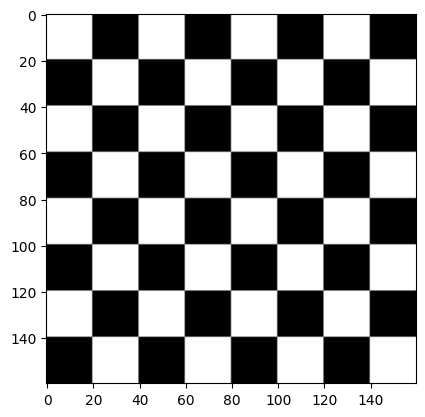

In [39]:
gray_img = np.zeros((heigth, width, 1), dtype = np.uint8)
block = 20
print(gray_img.shape)

for i in range(0, heigth, block):
    for j in range(0, width, block):
        if (i // block + j // block) % 2 == 0:
            gray_img[i:i+block, j:j+block] = 255
    
plt.imshow(gray_img, cmap='gray')
plt.show()

## Imagen de estilo Mondrian

Esta tarea consiste en la creación de una obra con el estilo artístico Mondrian.

Para realizar dicha imagen, se ha decidido recrear cuadrados de colores (dados por las coordenadas R, G, B) de manera periférica a un cuadrado grande en la esquina superior derecha de color cris claro.

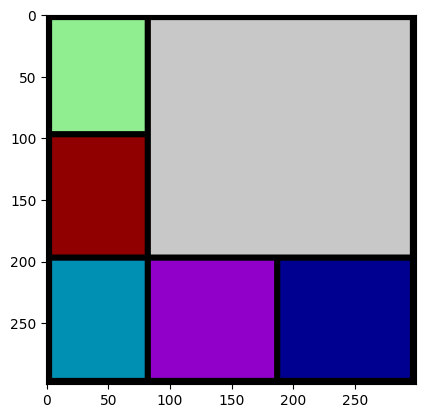

In [40]:
width = 300
heigth = 300

color_img = np.zeros((heigth, width, 3), dtype = np.uint8)

color_img[5:95, 5:80, 0] = 144
color_img[5:95, 5:80, 1] = 238
color_img[5:95, 5:80, 2] = 144

color_img[100:195, 5:80, 0] = 144

color_img[200:295, 5:80, 2] = 180
color_img[200:295, 5:80, 1] = 144

color_img[200:295, 85:185, 0] = 144
color_img[200:295, 85:185, 2] = 200

color_img[200:295, 190:295, 2] = 144

color_img [5:195, 85:295, 0] = 200
color_img [5:195, 85:295, 1] = 200
color_img [5:195, 85:295, 2] = 200

plt.imshow(color_img) 
plt.show()

## Utilización de las funciones de dibujo de OpenCV

Esta tarea consiste en utilizar las funciones dadas por el framework OpenCV, en el caso de la misma, utilizando dicho framewor, se va a realizar la creación de la bandera de Canarias.

Para la creación de la bandera de Canarias se ha hecho uso del método *cv2.rectangle* para crear las barras de color de la bandera, adicionalmente, mediante el método *cv2.putText* se asigna el texto "Canarias" en el medio en la parte central inferior.

Por último, manejando matplotlib, se manejan los ejes para quitar las barras y los números para dejar únicamente el marco negro alrededor de la imagen.

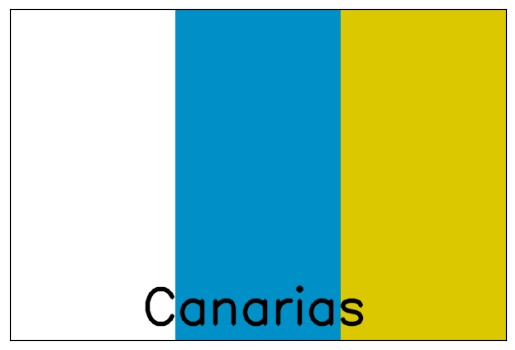

In [41]:
width = 600
heigth = 400

flag = np.zeros((heigth, width, 3), dtype=np.uint8)

stripe = width // 3

cv2.rectangle(flag, (0, 0), (stripe, heigth), (255, 255, 255), -1)
cv2.rectangle(flag, (stripe, 0), (2 * stripe, heigth), (0, 144, 200), -1)
cv2.rectangle(flag, (2 * stripe, 0), (width, heigth), (220, 200, 0), -1)

cv2.putText(flag, 'Canarias', (stripe - 40, heigth - 20), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3, cv2.LINE_AA)

def delete_ticks():
    plt.xticks([])
    plt.yticks([])

delete_ticks()
plt.imshow(flag)
plt.show()

## Modificar el plano de una imagen

La tarea consiste en cargar una imagen y tras esto, cambiar su plano de color, es decir, ver cómo sería la imagen en los planos R (Red), G (Green), B (Blue).

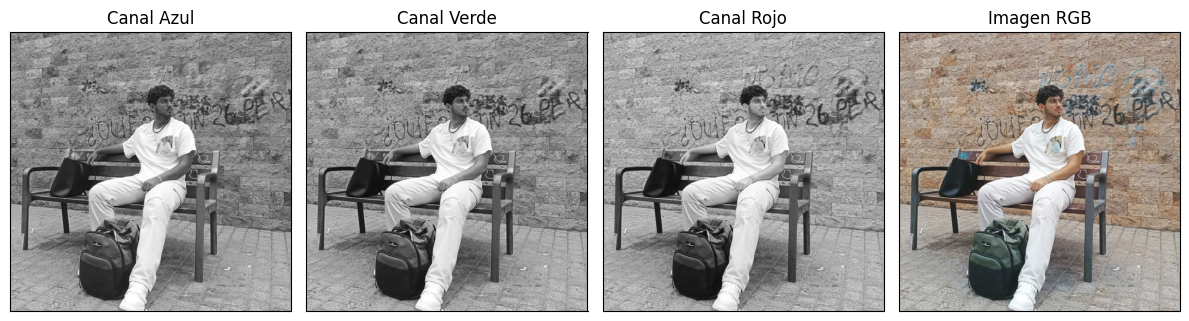

In [42]:
image = cv2.imread("Resources/Imagen.jpg")
blue, green, red = cv2.split(image)

plt.figure(figsize=(12,4))

def color_channel(color, text, pos):
    plt.subplot(1,4,pos)
    plt.imshow(color, cmap="gray")
    plt.title(str(text))

color_channel(blue, "Canal Azul", 1)
delete_ticks()
color_channel(green, "Canal Verde", 2)
delete_ticks()
color_channel(red, "Canal Rojo", 3)
delete_ticks()

plt.subplot(1,4,4)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Imagen RGB")
delete_ticks()

plt.tight_layout()
plt.show()

## Obtener punto más oscuro y brillante de una imagen

Para la realización de la siguiente tarea se va a hacer uso de la imagen utilizada anteriormente en donde, se va a pasar a escala de grises para obtener el punto más brillante (mínimo local) y el punto más oscuro (máximo local) de la misma.

Punto más oscuro: 12.0 en (207, 398)
Punto más claro: 255.0 en (503, 266)


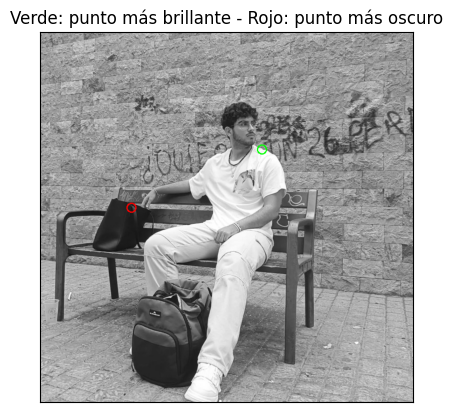

In [43]:
image = cv2.imread("Resources/Imagen.jpg", cv2.IMREAD_GRAYSCALE)

(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(image)

print(f"Punto más oscuro: {minVal} en {minLoc}")
print(f"Punto más claro: {maxVal} en {maxLoc}")

img_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

cv2.circle(img_color, minLoc, 10, (0,0,255), 2)

cv2.circle(img_color, maxLoc, 10, (0,255,0), 2)

plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Verde: punto más brillante - Rojo: punto más oscuro")
delete_ticks()
plt.show()

## Diseño Pop Art con la entrada de la cámara web

Esta tarea consiste en utilizar la entrada de la cámara del dispositivo que se esté usando y mostrar un diseño Pop Art de la misma, es decir, mostrar la imagen repetida 9 veces con diferentes paletas de colores.

Para la realización de la misma, se hace uso principalmente del framework OpenCV con los métodos de *COLORMAP* para aplicar diferentes mapas de color a cada imagen individual.

In [44]:
vid = cv2.VideoCapture(0)

while True:      
    ret, frame = vid.read()
    if not ret:
        break

    # Reducimos tamaño para que quepa mejor en el collage
    h, w, _ = frame.shape
    frame_small = cv2.resize(frame, (w//3, h//3))

    # Creamos 9 versiones aplicando diferentes mapas de color (Pop Art)
    pop_variants = [
        cv2.applyColorMap(frame_small, cv2.COLORMAP_JET),
        cv2.applyColorMap(frame_small, cv2.COLORMAP_HOT),
        cv2.applyColorMap(frame_small, cv2.COLORMAP_COOL),
        cv2.applyColorMap(frame_small, cv2.COLORMAP_PINK),
        cv2.applyColorMap(frame_small, cv2.COLORMAP_HSV),
        cv2.applyColorMap(frame_small, cv2.COLORMAP_OCEAN),
        cv2.applyColorMap(frame_small, cv2.COLORMAP_BONE),
        cv2.applyColorMap(frame_small, cv2.COLORMAP_SPRING),
        cv2.applyColorMap(frame_small, cv2.COLORMAP_RAINBOW),
    ]

    row1 = np.hstack(pop_variants[0:3])
    row2 = np.hstack(pop_variants[3:6])
    row3 = np.hstack(pop_variants[6:9])
    collage = np.vstack((row1, row2, row3))

    # Mostramos resultado
    cv2.imshow('Pop-Art', collage)

    # ESC para salir
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

## Fuentes y Documentación

- Internet (Google): Utilizado para la búsqueda del tamaño de un tablero de ajedrez y ejemplos de imágenes del estilo Mondrian y Pop-Art.

- Inteligencia artificial generativa (ChatGPT): Utilizado para obtener una lista de métodos de OpenCV posteriormente utilizados en las tareas, así cómo revisión de posibles fallos en la realización de las tareas: *"Modificar el plano de una imagen"* y *"Diseño Pop Art con la entrada de la cámara web"*.

Para más documentación referente a las tareas, véase el README asociado a la carpeta de la práctica en cuestión (VC_P1).


### **--- Iván Pérez Díaz ---**